In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

import nanonets_utils
import nanonets

### Network

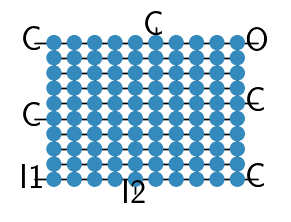

In [2]:
network_topology    = "cubic"
topology_parameter  = {
    "Nx"    : 10,
    "Ny"    : 10,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[4,0,0],[9,0,0],[0,4,0],[0,9,0],[5,9,0],[9,5,0],[9,9,0]]
}

np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

with plt.style.context(["science","bright"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    fig, ax = nanonets_utils.display_network(np_network_sim=np_network_sim, fig=fig, ax=ax, node_size=100,
                                             provide_electrode_labels=['I1','I2','C','C','C','C','C','O'], font_size=25)
    fig.savefig("plots/network.pdf",bbox_inches='tight')

### Cubic Networks

In [4]:
df1 = pd.read_csv('data/Nx=10_Ny=10_Nz=1_Ne=8_0.csv')
# df2 = pd.read_csv('data/net_currents_Nx=10_Ny=10_Nz=1_Ne=8_0.csv')
# df3 = pd.read_csv('data/mean_state_Nx=10_Ny=10_Nz=1_Ne=8_0.csv')

for i in range(1,10):
    df1 = pd.concat([df1,pd.read_csv(f'data/Nx=10_Ny=10_Nz=1_Ne=8_{i}.csv')],ignore_index=True)
    # df2 = pd.concat([df2,pd.read_csv(f'data/net_currents_Nx=10_Ny=10_Nz=1_Ne=8_{i}.csv')],ignore_index=True)
    # df3 = pd.concat([df3,pd.read_csv(f'data/mean_state_Nx=10_Ny=10_Nz=1_Ne=8_{i}.csv')],ignore_index=True)

df1.to_csv('data/Nx=10_Ny=10_Nz=1_Ne=8.csv',index=False)
# df2.to_csv('data/net_currents_Nx=10_Ny=10_Nz=1_Ne=8.csv',index=False)
# df3.to_csv('data/mean_state_Nx=10_Ny=10_Nz=1_Ne=8.csv',index=False)

In [5]:
df1, df2 = nanonets_utils.get_boolean_data("data/", N=10, N_e=8, on_state=[0.1], i1_col=0, i2_col=1)

In [6]:
gates   = ['P','Q','AND','OR','PnotQ','XOR','notPQ','NAND','notQ','notP','NOR','notPandQ','PandnotQ','XNOR']
gates2  = [f'{gate} Fitness' for gate in gates]
markers = ['s','o','^','v','<','>','D','p','8','s','o','^','v','<','>','D','p','8']
labels  = ['$P$','$Q$','$PQ$','$P+Q$','$P\\bar{Q}$','$\\bar{P}Q+P\\bar{Q}$','$\\bar{P}Q$','$\\bar{P}+\\bar{Q}$','$\\bar{Q}$','$\\bar{P}$','$\\bar{P}\\bar{Q}$','$\\bar{P}+Q$','$P+\\bar{Q}$','$PQ+\\bar{P}\\bar{Q}$']

In [7]:
dff = nanonets_utils.fitness(df=df1, N_controls=5, gates=gates, delta=0.1, on_state=0.1)
dfa = nanonets_utils.abundance(df=dff, gates=gates2)

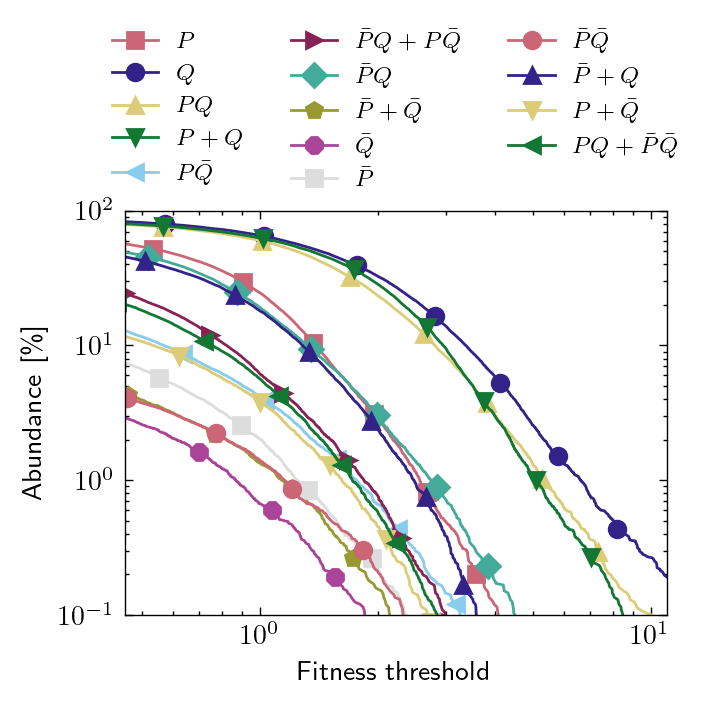

In [17]:
with plt.style.context(["science","muted"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, gate in enumerate(gates):

        ax = dfa.plot(x=f'{gate} Fitness', y=f'{gate} Fitness Abundance', ax=ax, label=gate, marker=markers[i], markevery=0.15)
    
    ax.set_xlabel('Fitness threshold')
    ax.set_ylabel('Abundance [\%]')
    ax.set_ylim(0.1,100)
    ax.set_xlim(0.45,11)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(labels, ncol=3, fontsize='small', loc='center', bbox_to_anchor=(0.5,1.25))
    fig.savefig("plots/sim_results.pdf", bbox_inches='tight')

### Disordered Networks

In [10]:
df1 = pd.DataFrame()

for i in range(0,10):
    for j in range(5):
        try:
            df1 = pd.concat([df1,pd.read_csv(f'data/Np=100_Nj=4_Ne=8_{i}_{j}.csv')], ignore_index=True)
        except:
            pass
df1.to_csv(f'data/Np=100_Nj=4_Ne=8.csv',index=False)

In [11]:
df1_d, df2_d = nanonets_utils.get_boolean_data("data/", N=100, N_e=8, on_state=[0.1], i1_col=0, i2_col=1, disordered=True)

In [12]:
gates   = ['P','Q','AND','OR','PnotQ','XOR','notPQ','NAND','notQ','notP','NOR','notPandQ','PandnotQ','XNOR']
gates2  = [f'{gate} Fitness' for gate in gates]
markers = ['s','o','^','v','<','>','D','p','8','s','o','^','v','<','>','D','p','8']
labels  = ['$P$','$Q$','$PQ$','$P+Q$','$P\\bar{Q}$','$\\bar{P}Q+P\\bar{Q}$','$\\bar{P}Q$','$\\bar{P}+\\bar{Q}$','$\\bar{Q}$','$\\bar{P}$','$\\bar{P}\\bar{Q}$','$\\bar{P}+Q$','$P+\\bar{Q}$','$PQ+\\bar{P}\\bar{Q}$']

In [13]:
dff_d = nanonets_utils.fitness(df=df1_d, N_controls=5, gates=gates, delta=0.1, on_state=0.1)
dfa_d = nanonets_utils.abundance(df=dff_d, gates=gates2)

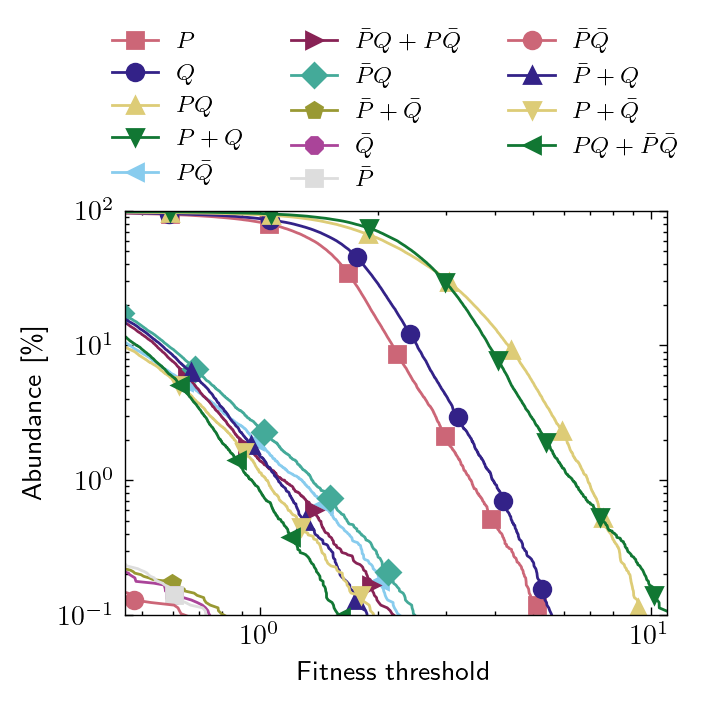

In [18]:
with plt.style.context(["science","muted"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, gate in enumerate(gates):

        ax = dfa_d.plot(x=f'{gate} Fitness', y=f'{gate} Fitness Abundance', ax=ax, label=gate, marker=markers[i], markevery=0.15)
    
    ax.set_xlabel('Fitness threshold')
    ax.set_ylabel('Abundance [\%]')
    ax.set_ylim(0.1,100)
    ax.set_xlim(0.45,11)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(labels, ncol=3, fontsize='small', loc='center', bbox_to_anchor=(0.5,1.25))
    fig.savefig("plots/sim_dis_results.pdf", bbox_inches='tight')

In [32]:
df_f_gates = pd.DataFrame()

for gate in ['AND','NAND','XOR']:

    df_t1           = pd.DataFrame()
    df_t1['Fitness']= dff[f'{gate} Fitness'].copy().values
    df_t1['Net']    = 's'
    df_t1['Gate']   = gate

    df_t2           = pd.DataFrame()
    df_t2['Fitness']= dff_d[f'{gate} Fitness'].copy().values
    df_t2['Net']    = 'd'
    df_t2['Gate']   = gate
    
    df_t            = pd.concat([df_t1, df_t2], ignore_index=True)   
    df_f_gates      = pd.concat([df_f_gates, df_t], ignore_index=True)

df_f_gates

,Fitness,Net,Gate
0,1.676173,s,AND
1,2.039094,s,AND
2,0.960945,s,AND
3,2.068734,s,AND
4,1.996612,s,AND
...,...,...,...
113386,-0.145188,d,XOR
113387,-0.435667,d,XOR
113388,0.232505,d,XOR
113389,0.416057,d,XOR


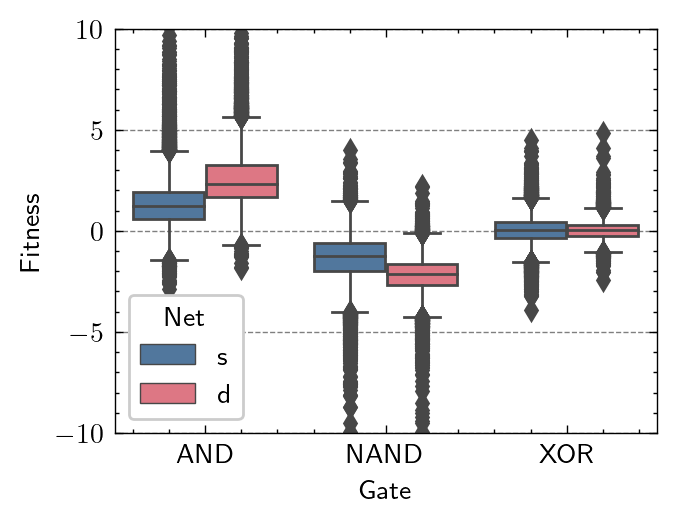

: 

In [41]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax  = sns.boxplot(data=df_f_gates, x='Gate', y='Fitness', hue='Net')
    ax.set_ylim(-10,10)